In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
individual_df = pd.read_csv('../dataset/feature_importance_individual_analysis.csv')
collective_df = pd.read_csv('../dataset/feature_importance_collective_analysis.csv')

# Merge the dataframes based on the 'ml_model' column
merged_df = pd.merge(individual_df, collective_df, on='ml_model')

merged_df

,ml_model,ri_AcquiringFactor,ri_SharingFactor,normalized_ri_AcquiringFactor,normalized_ri_SharingFactor,ri_CooperativeFactor,ri_NonCooperativeFactor,normalized_ri_CooperativeFactor,normalized_ri_NonCooperativeFactor
0,Binary Logistic Regression,1.083492,0.497534,0.685310,0.314690,-3.824359,-0.614880,0.861490,0.138510
1,Decision Tree,0.567438,0.432562,0.567438,0.432562,0.819018,0.180982,0.819018,0.180982
2,Random Forest,0.629853,0.370147,0.629853,0.370147,0.950841,0.049159,0.950841,0.049159
3,XGBoost,0.808124,0.191876,0.808124,0.191876,0.971468,0.028532,0.971468,0.028532


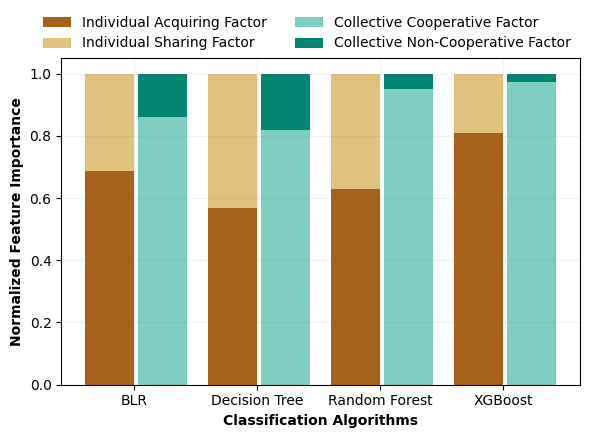

In [2]:
# Set the figure size
fig, ax = plt.subplots(figsize=(6, 4))

# Define the width of the bars
bar_width = 0.4

# Define the positions of the bars
r1 = range(len(merged_df))
r2 = [x + bar_width + 0.03 for x in r1]

# Plot the individual metrics
ax.bar(r1, merged_df['normalized_ri_AcquiringFactor'], color='#a6611a', width=bar_width, label='Individual Acquiring Factor')
ax.bar(r1, merged_df['normalized_ri_SharingFactor'], bottom=merged_df['normalized_ri_AcquiringFactor'], color='#dfc27d', width=bar_width, label='Individual Sharing Factor')

# Plot the collective metrics
ax.bar(r2, merged_df['normalized_ri_CooperativeFactor'], color='#80cdc1', width=bar_width, label='Collective Cooperative Factor')
ax.bar(r2, merged_df['normalized_ri_NonCooperativeFactor'], bottom=merged_df['normalized_ri_CooperativeFactor'], color='#018571', width=bar_width, label='Collective Non-Cooperative Factor')

# Add labels
ax.set_xlabel('Classification Algorithms', fontweight='bold')
ax.set_ylabel('Normalized Feature Importance', fontweight='bold')
ax.set_xticks([r + bar_width/2 for r in r1], merged_df['ml_model'])
ax.grid(axis='both', which='major', color='gray', alpha=0.1)

handles, labels = ax.get_legend_handles_labels()

xlabels = ['BLR', 'Decision Tree', 'Random Forest', 'XGBoost']
ax.set_xticklabels(xlabels)
ax.set_ylim([0, 1.05])

# Add legend outside the plot
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.52, 0.95), ncols=2, frameon=False, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()